In [11]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [12]:
d_p = 40
d_V = 40
epochs = 300


In [13]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])



In [14]:
folder_path = "data/test_data/example_data/heat2d/"

In [15]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-16 20:30:56,347 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [16]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 5204.66it/s]


In [17]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [18]:
loss_history_train,loss_history_test = model.fit()

Loading y data:   0%|          | 0/40 [00:00<?, ?it/s]

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 5092.34it/s]
2025-03-16 20:30:56.854850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-16 20:30:56.874312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-16 20:30:57.004683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

In [19]:
print(loss_history_train)

[0.29840314388275146, 0.28795090317726135, 0.28112757205963135, 0.2755112648010254, 0.26967430114746094, 0.2638587951660156, 0.2582840025424957, 0.2530507743358612, 0.24792127311229706, 0.24318674206733704, 0.2390056550502777, 0.23499874770641327, 0.23107263445854187, 0.2270817756652832, 0.22293275594711304, 0.21857039630413055, 0.2140057235956192, 0.20932675898075104, 0.20461034774780273, 0.19985303282737732, 0.19500552117824554, 0.19010186195373535, 0.1852838695049286, 0.18055373430252075, 0.17596115171909332, 0.17150619626045227, 0.16722480952739716, 0.1631781905889511, 0.15941816568374634, 0.15593722462654114, 0.15278507769107819, 0.14998000860214233, 0.14754042029380798, 0.14549604058265686, 0.14376704394817352, 0.14222918450832367, 0.1407996416091919, 0.13944247364997864, 0.13814207911491394, 0.13689590990543365, 0.1357206404209137, 0.13462863862514496, 0.13360969722270966, 0.1326417326927185, 0.1316778063774109, 0.13068479299545288, 0.12964677810668945, 0.12860307097434998, 0.12

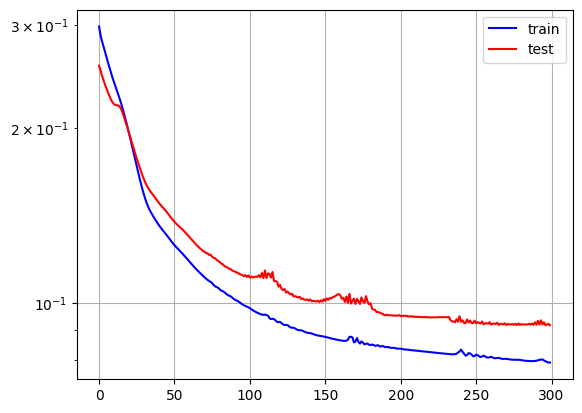

In [20]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()